### Dataset Fuel Consumption

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [137]:
# EDA
fuel_data = pd.read_csv('Fuel_Consumption_Ratings.csv')
fuel_data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption,Fuel Consumption Comb_mpg,CO2 Emissions,CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [138]:
# Menampilkan nilai statistik dasar
fuel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Model Year,955.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
Engine Size,955.0,3.204188,1.369863,1.2,2.0,3.0,4.0,8.0
Cylinders,955.0,5.684817,1.934496,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City,955.0,12.548377,3.459582,4.0,10.2,12.3,14.7,30.3
Fuel Consumption Hwy,955.0,9.400628,2.305053,3.9,7.7,9.2,10.7,20.9
Fuel Consumption,955.0,11.131728,2.888651,4.0,9.1,10.9,13.0,26.1
Fuel Consumption Comb_mpg,955.0,27.158115,7.686134,11.0,22.0,26.0,31.0,71.0
CO2 Emissions,955.0,260.110995,64.780198,94.0,214.0,258.0,302.5,608.0
CO2 Rating,955.0,4.519372,1.477430,1.0,3.0,4.0,5.0,10.0
Smog Rating,955.0,4.947644,1.674629,1.0,3.0,5.0,6.0,7.0


### Analisis 
menampilkan deskripsi singkat mengenai dataset yang didalamnya terdapat mean, nilai minimum dan maksimum, serta kuartik

In [139]:
fuel_data.duplicated().sum()

np.int64(0)

### Analisis
Menghitung jumlah data duplikat, yang hasilnya tidak terdapat data duplikat pada dataset fuel consumption

### Feature Engineering

In [140]:
# Cek missing value
print("\nMissing Values:")
print(fuel_data.isnull().sum())


Missing Values:
Model Year                   0
Make                         0
Model                        0
Vehicle Class                0
Engine Size                  0
Cylinders                    0
Transmission                 0
Fuel                         0
Fuel Consumption City        0
Fuel Consumption Hwy         0
Fuel Consumption             0
Fuel Consumption Comb_mpg    0
CO2 Emissions                0
CO2 Rating                   0
Smog Rating                  0
dtype: int64


### Analisis
Melakukan cek missing value pada masing-masing kolom fitur dan hasilnya tidak terdapat missing value pada masing-masing kolom

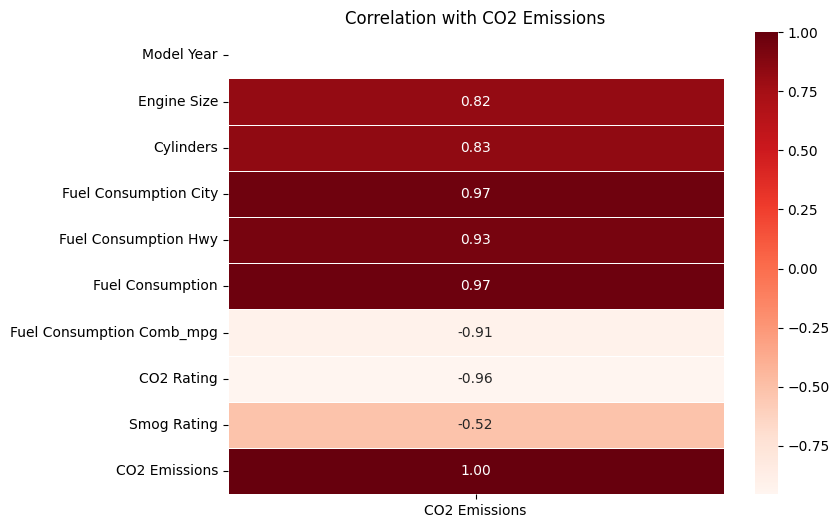

In [141]:
# Pilih semua fitur kecuali target dan fitur non-numerik
excluded_columns = ['CO2 Emissions', 'Model', 'Make', 'Vehicle Class', 'Transmission', 'Fuel']
feature_columns = [col for col in fuel_data.columns if col not in excluded_columns]
data = fuel_data[feature_columns + ['CO2 Emissions']]

# Compute Pearson correlation
target_correlation = data.corr()[['CO2 Emissions']]

# Plot heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds, fmt='.2f', linewidths=0.5)
plt.title("Correlation with CO2 Emissions")
plt.show()

### Analisis
Melakukan perhitungan korelasi antar variabel dengan CO2 Emisions sebagai variabel target. Berdasarkan plot diatas bisa dilihat bahwa terdapat 5 variabel yang memiliki korelasi positif kuat terhadap target dan sisanya berkorelasi negatif kuat

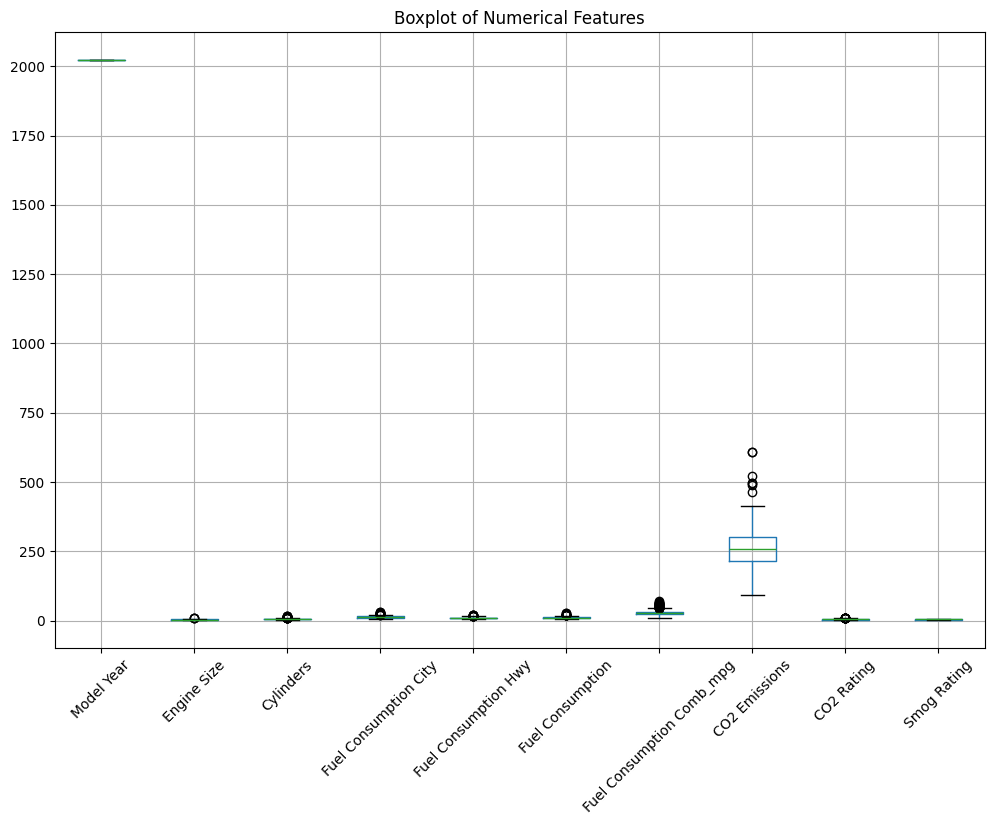

In [142]:
# Plot boxplot untuk melihat outlier pada fitur numerik
numerical_cols = fuel_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
fuel_data[numerical_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features")
plt.show()

### Analisis
Melakukan cek outlier sebelum ke feature selection, berdasarkan output variabel CO2 Emissions memiliki outlier yang perlu dihandling begtu juga variabel Fuel Consumption dan Cylinders juga memiliki outlier. Outlier ini sifatnya bisa dihilangkan atau jika memang dalam kondisi dibutuhkan, kita bisa melakukan handling untuk tetap menjaga nilai tersebut.

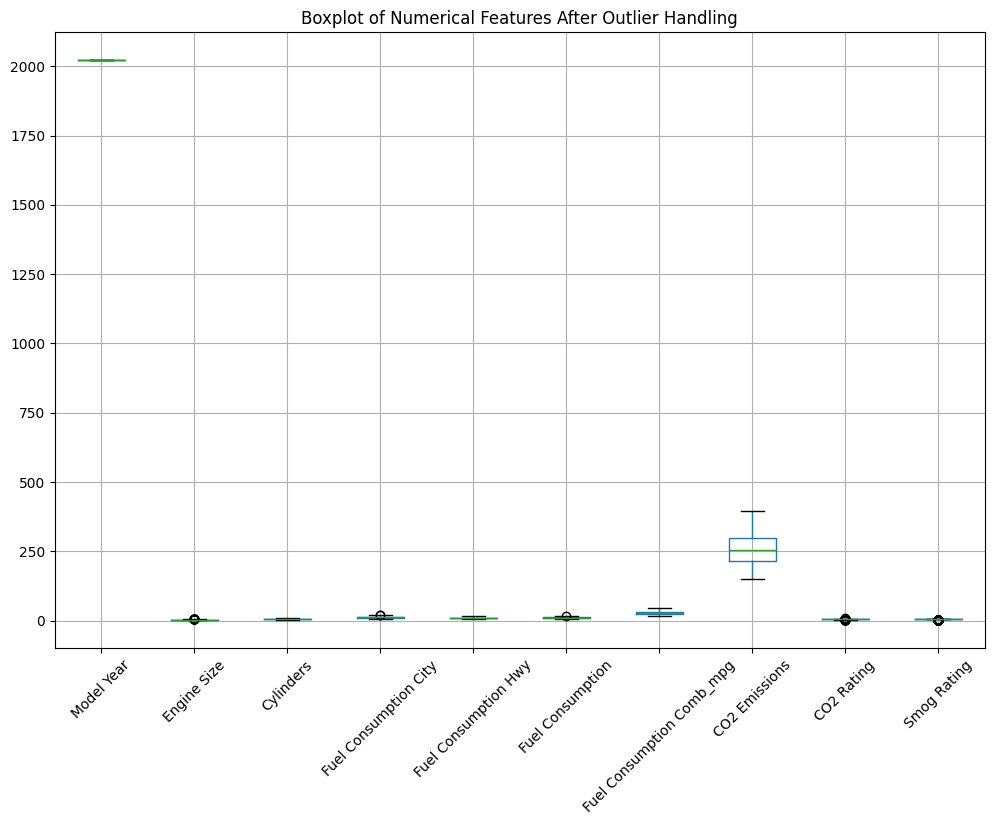

((955, 15), (896, 15))

In [143]:
# Reapply outlier handling steps
numerical_cols = fuel_data.select_dtypes(include=['float64', 'int64']).columns
Q1 = fuel_data[numerical_cols].quantile(0.25)
Q3 = fuel_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

fuel_data_cleaned = fuel_data[~((fuel_data[numerical_cols] < lower_bound) | (fuel_data[numerical_cols] > upper_bound)).any(axis=1)]

# Plot boxplot again to verify outlier removal
plt.figure(figsize=(12, 8))
fuel_data_cleaned[numerical_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features After Outlier Handling")
plt.show()
# Checking the shape before and after removing outliers
fuel_data.shape, fuel_data_cleaned.shape


### Analisis
Setelah dilakukan handling outlier, distribusi data terlihat lebih terkendali dengan berkurangnya titik outlier yang sebelumnya muncul di fitur seperti "CO2 Emissions" dan "Fuel Consumption". Namun, pola distribusi terlihat alami. Hal ini menunjukkan bahwa metode yang digunakan berhasil dalam menyeimbangkan data tanpa menghilangkan variasi signifikan

In [144]:
# Apply feature scaling
scaler = StandardScaler()
num_features = ["Engine Size", "Cylinders", "Fuel Consumption", "CO2 Emissions"]

fuel_data_scaled = fuel_data_cleaned.copy()
fuel_data_scaled[num_features] = scaler.fit_transform(fuel_data_scaled[num_features])


### Analisis
Kode diatas menerapkan standardisasi pada fitur numerik dengan menggunakan StandardScaler dengan mengubah nilai setiap fitur sehingga memiliki mean 0 dan standar deviasi 1. Hal ini membantu meningkatkan performa model dengan memastikan semua fitur memiliki skala yang sama

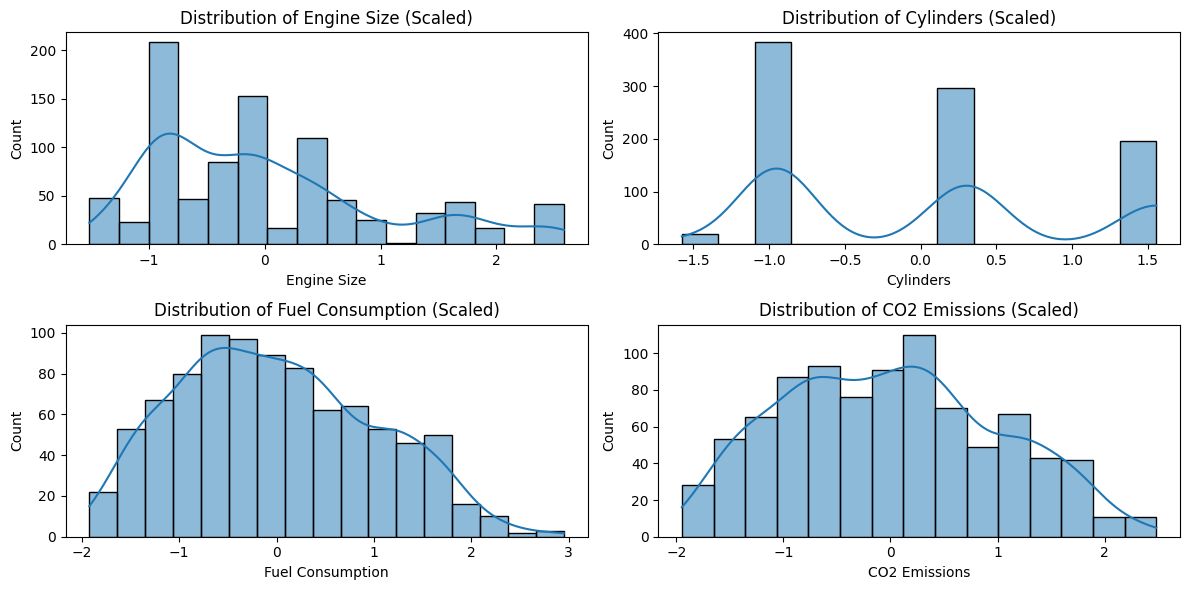

In [145]:
# Plot histogram to check scaled features
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(fuel_data_scaled[col], kde=True)
    plt.title(f"Distribution of {col} (Scaled)")

plt.tight_layout()
plt.show()

### Analisis
Plot menunjukkan distribusi fitur numerik setelah dilakukan standardisasi dengan StandardScaler. Engine Size dan Cylinders masih memiliki distribusi yang tidak merata dengan beberapa puncak yang menunjukkan data kategori tertentu, sedangkan Fuel Consumption dan CO2 Emissions lebih mendekati distribusi normal.

In [ ]:
# Encoding 
cat_features = ["Transmission", "Fuel", "Vehicle Class"]
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_features = encoder.fit_transform(fuel_data_cleaned[cat_features])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_features))

df_final = fuel_data_cleaned.drop(columns=cat_features + ["Make", "Model", "Model Year"])
df_final = pd.concat([df_final.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

df_final.shape, df_final.head()

((896, 47),
    Engine Size  Cylinders  Fuel Consumption City  Fuel Consumption Hwy  \
 0          2.4          4                    9.9                   7.0   
 1          3.5          6                   12.6                   9.4   
 2          2.0          4                   11.0                   8.6   
 3          2.0          4                   11.3                   9.1   
 4          2.0          4                   11.2                   8.0   
 
    Fuel Consumption  Fuel Consumption Comb_mpg  CO2 Emissions  CO2 Rating  \
 0               8.6                         33            200           6   
 1              11.2                         25            263           4   
 2               9.9                         29            232           5   
 3              10.3                         27            242           5   
 4               9.8                         29            230           5   
 
    Smog Rating  Transmission_A6  ...  Vehicle Class_Minivan  \
 0

### Analisis
Dilakukan encoding pada variabel dengan value bertipe kategorikal, hal ini berguna untuk mengubah tipe data kategorikal menjadi tipe data numerik dan memudahkan pemodelan

## Modeling dataset

In [147]:
# Define features and target
X = df_final.drop(columns=["CO2 Emissions"])
y = df_final["CO2 Emissions"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize models
lr_model = LinearRegression()
# Train models
lr_model.fit(X_train, y_train)
# Predictions
y_pred_lr = lr_model.predict(X_test)
# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)


In [148]:
# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train models
rf_model.fit(X_train, y_train)
# Predictions
y_pred_rf = rf_model.predict(X_test)
# Evaluate models
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)


In [149]:
# Print final evaluation results
print("="*40)
print("Final Evaluation Results")
print("="*40)

print(f"Linear Regression:\n - MSE: {mse_lr:.5f}\n - RMSE: {rmse_lr:.5f}\n - MAE: {mae_lr:.5f}\n - R² Score: {r2_lr:.5f}")
print("\n")
print(f"Random Forest Regression:\n - MSE: {mse_rf:.5f}\n - RMSE: {rmse_rf:.5f}\n - MAE: {mae_rf:.5f}\n - R² Score: {r2_rf:.5f}")

Final Evaluation Results
Linear Regression:
 - MSE: 4.94749
 - RMSE: 2.22430
 - MAE: 1.51532
 - R² Score: 0.99847


Random Forest Regression:
 - MSE: 6.31564
 - RMSE: 2.51309
 - MAE: 1.32651
 - R² Score: 0.99805


### Analisis
Hasil menunjukkan bahwa Linear Regression memiliki performa yang lebih baik dibandingkan Random Forest Regression, ditunjukkan oleh nilai MSE, RMSE, dan MAE yang lebih rendah serta R² Score yang lebih tinggi (0.99847 vs. 0.99805). Kedua model memiliki R² Score yang sangat tinggi, menandakan bahwa keduanya mampu menjelaskan hampir semua variasi dalam data. Namun, Linear Regression lebih unggul dalam hal akurasi dan kesalahan prediksi yang lebih kecil.

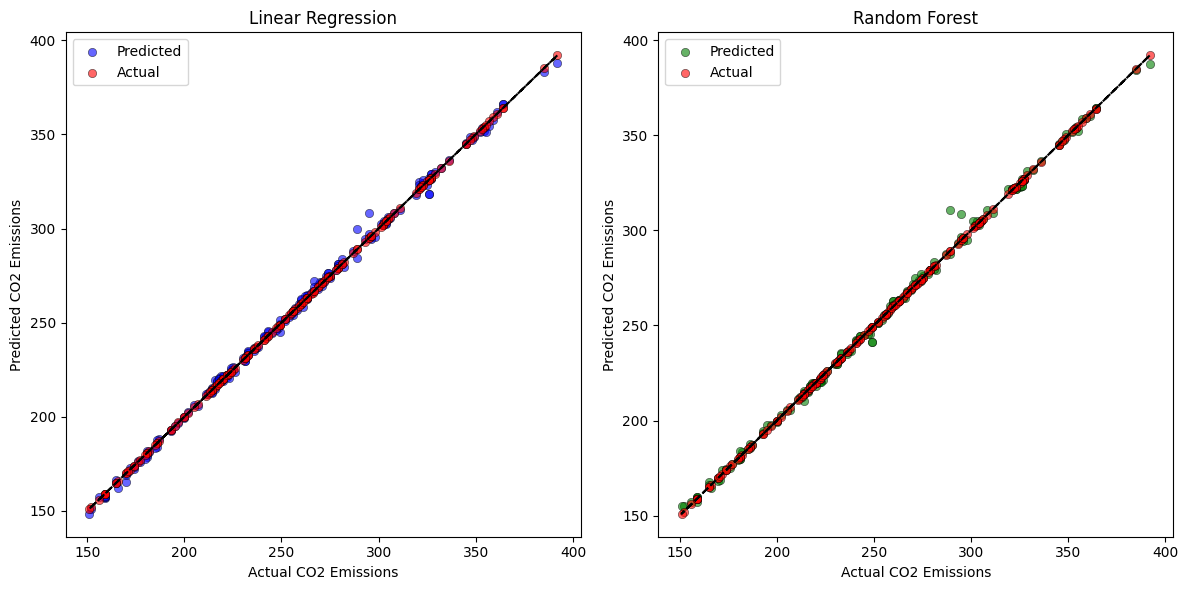

In [150]:
# Visualisasi Actual vs Predicted untuk masing-masing model
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Linear Regression
sns.scatterplot(ax=axes[0], x=y_test, y=y_pred_lr, color='blue', alpha=0.6, edgecolor='black', label='Predicted')
sns.scatterplot(ax=axes[0], x=y_test, y=y_test, color='red', alpha=0.6, edgecolor='black', label='Actual')
axes[0].plot(y_test, y_test, color='black', linestyle='--')
axes[0].set_xlabel("Actual CO2 Emissions")
axes[0].set_ylabel("Predicted CO2 Emissions")
axes[0].set_title("Linear Regression")
axes[0].legend()

# Random Forest
sns.scatterplot(ax=axes[1], x=y_test, y=y_pred_rf, color='green', alpha=0.6, edgecolor='black', label='Predicted')
sns.scatterplot(ax=axes[1], x=y_test, y=y_test, color='red', alpha=0.6, edgecolor='black', label='Actual')
axes[1].plot(y_test, y_test, color='black', linestyle='--')
axes[1].set_xlabel("Actual CO2 Emissions")
axes[1].set_ylabel("Predicted CO2 Emissions")
axes[1].set_title("Random Forest")
axes[1].legend()

plt.tight_layout()
plt.show()


### Analisis
Plot menunjukkan perbandingan antara nilai aktual dan prediksi emisi CO2 untuk model Linear Regression dan Random Forest. Kedua model memiliki prediksi yang sangat mendekati nilai aktual, terlihat dari titik-titik yang hampir sejajar dengan garis diagonal. 

In [151]:
# Compare which model is better
print(f"Linear Regression R² Score: {r2_lr:.4f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

if r2_rf > r2_lr:
    print("\nRandom Forest Regression performs better based on R² Score.")
elif r2_rf < r2_lr:
    print("\nLinear Regression performs better based on R² Score.")
else:
    print("\nBoth models perform equally based on R² Score.")


Linear Regression R² Score: 0.9985
Random Forest R² Score: 0.9981

Linear Regression performs better based on R² Score.


### Analisis
Berdasarkan output tersebut bisa dipastikan liniear regression memiliki performa yang bagus dalam memprediksi dataset fuel consumption jika dilihat berdasarkan R2 Score

### Dataset Hepatitis

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

In [153]:
# EDA
hepadf = pd.read_csv('hepatitis.csv')
hepadf

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2.0,2,1,1,1,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
150,0,44,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
151,0,61,1,1.0,2,1,1,2,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
152,0,53,2,1.0,2,1,2,2,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [154]:
hepadf.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,154.0,0.207792,0.407051,0.0,0.00,0.0,0.00,1.0
AGE,154.0,41.246753,12.593344,7.0,32.00,39.0,50.00,78.0
SEX,154.0,1.103896,0.306121,1.0,1.00,1.0,1.00,2.0
STEROID,153.0,1.509804,0.501546,1.0,1.00,2.0,2.00,2.0
ANTIVIRALS,154.0,1.844156,0.363891,1.0,2.00,2.0,2.00,2.0
FATIGUE,154.0,1.350649,0.478730,1.0,1.00,1.0,2.00,2.0
MALAISE,154.0,1.603896,0.490682,1.0,1.00,2.0,2.00,2.0
ANOREXIA,154.0,1.792208,0.407051,1.0,2.00,2.0,2.00,2.0
LIVER BIG,145.0,1.827586,0.379049,1.0,2.00,2.0,2.00,2.0
LIVER FIRM,144.0,1.583333,0.494727,1.0,1.00,2.0,2.00,2.0


In [155]:
hepadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            154 non-null    int64  
 1   AGE              154 non-null    int64  
 2   SEX              154 non-null    int64  
 3   STEROID          153 non-null    float64
 4   ANTIVIRALS       154 non-null    int64  
 5   FATIGUE          154 non-null    int64  
 6   MALAISE          154 non-null    int64  
 7   ANOREXIA         154 non-null    int64  
 8   LIVER BIG        145 non-null    float64
 9   LIVER FIRM       144 non-null    float64
 10  SPLEEN PALPABLE  150 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          150 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        149 non-null    float64
 15  ALK PHOSPHATE    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

### Analisis
Menampilkan secara singkat informasi mengenai tipe data dari dataset hepatitis

In [156]:
# Cek missing values
print("Missing values per column:\n", hepadf.isnull().sum())

Missing values per column:
 Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64


### Analisis
Melakukan cek missing value dari dataset, hasilnya menunjukkan beberapa kolom memiliki missing value seperti steroid, liver firm, spleen palpable, dan lain sebagainya. Hal ini menunjukkan bahwa missing value tersebut harus ditangani

### Feature Engineering

In [157]:
# Handling Missing Values
imputer_numeric = SimpleImputer(strategy='median')
numeric_cols = hepadf.select_dtypes(include=[np.number]).columns
hepadf[numeric_cols] = imputer_numeric.fit_transform(hepadf[numeric_cols])

### Analisis
Missing value dari beberapa variabel ditangani dengna metode imputate dengan menggunakan median atau nilai tengah

In [158]:
# Cek missing values
print("Missing values per column:\n", hepadf.isnull().sum())

Missing values per column:
 Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64


### Analisis
Setelah dilakukan handling terhadap missing value, hassilnya nampak seperti pada output

In [159]:
# Mengecek distribusi kelas target
print(hepadf['Class'].value_counts())

Class
0.0    122
1.0     32
Name: count, dtype: int64


### Analisis
melakukan cek distribusi terhadap target, berdaasarkan output, hasil menunjukkan data imbalance pada variabel target

In [ ]:
# Encoding categorical
label_encoder = LabelEncoder()
if 'SEX' in hepadf.columns:
    hepadf['SEX'] = label_encoder.fit_transform(hepadf['SEX'])

### Analsis
melakukan encoding pada variabel 'SEX' yang memiliki value kategorikal

In [ ]:
# Feature Selection
X = hepadf.drop(columns=['Class']) 
y = hepadf['Class']  

In [162]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=7)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['MALAISE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALBUMIN',
       'HISTOLOGY'],
      dtype='object')


### Analisis
Melakukan pemilihan fitur terbaik berdasarkan batas k=7 menggunakan library SelectKBest, pemilihan fitur ini atau feature selection dgunakan untuk memilih variabel yang akan dilakukan pemodelan

In [163]:
# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Analisis
Melakukan split dataset dengan persentase 80% sebagai data train dan 20% sebagai data test

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluasi Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)
print("\n==== Logistic Regression Performance ====")
print(f"Accuracy: {acc_lr:.4f}")
print(f"AUC-ROC Score: {auc_lr:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


==== Logistic Regression Performance ====
Accuracy: 0.8710
AUC-ROC Score: 0.9000
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        25
         1.0       0.75      0.50      0.60         6

    accuracy                           0.87        31
   macro avg       0.82      0.73      0.76        31
weighted avg       0.86      0.87      0.86        31



c:\Users\MSI 14\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Analisis
Pemodelan dengan logistic regression menghasilkan akurasi yang cukup tinggi sebesar 87.1%, dengan skor AUC-ROC 0.9, menunjukkan kemampuan yang baik dalam membedakan kelas positif dan negatif. 

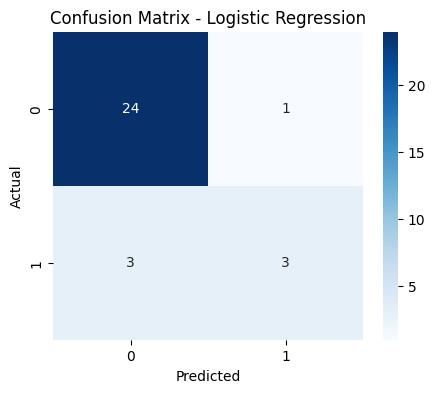

In [165]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Analisis
Model bekerja sangat baik dalam memprediksi kelas mayoritas (0) tetapi kurang optimal dalam mendeteksi kelas minoritas (1)

In [166]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluasi Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("\n==== Random Forest Performance ====")
print(f"Accuracy: {acc_rf:.4f}")
print(f"AUC-ROC Score: {auc_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


==== Random Forest Performance ====
Accuracy: 0.9032
AUC-ROC Score: 0.9267
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        25
         1.0       1.00      0.50      0.67         6

    accuracy                           0.90        31
   macro avg       0.95      0.75      0.81        31
weighted avg       0.91      0.90      0.89        31



### Analisis
Model Random Forest menghasilkan akurasi yang lebih tinggi dibandingkan Logistic Regression, yaitu 90.32%. Model ini memiliki precision sempurna (1.00) untuk kelas 1, tetapi recall-nya rendah (0.50), yang berarti model sering salah mengklasifikasikan kelas 1 sebagai kelas 0. 

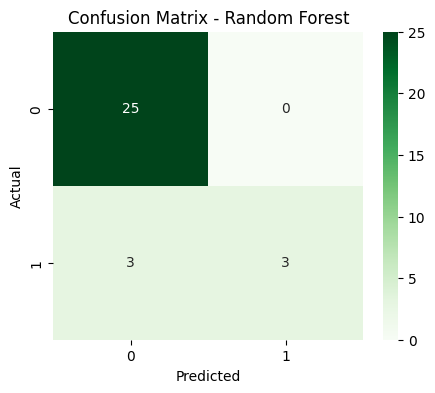

In [167]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Analisis
matrix menunjukkan bahwa Random Forest mampu mengklasifikasikan semua 25 sampel kelas 0 dengan benar tanpa kesalahan. Namun, untuk kelas 1, model hanya berhasil mengklasifikasikan 3 sampel dengan benar. Berdasarkan hal tersebut dapat dikatakan bahwa model kurang mammpu mengenali kelas minoritas

In [ ]:
### Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluasi SVM
acc_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)
print("\n==== SVM Performance ====")
print(f"Accuracy: {acc_svm:.4f}")
print(f"AUC-ROC Score: {auc_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


==== SVM Performance ====
Accuracy: 0.8065
AUC-ROC Score: 0.2667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        25
         1.0       0.00      0.00      0.00         6

    accuracy                           0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31



c:\Users\MSI 14\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MSI 14\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MSI 14\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Analisis
Hasil menunjukkan akurasi yang cukup baik secara keseluruhan, tetapi performanya sangat buruk dalam mengklasifikasikan kelas 1, dengan recall dan f1-score sebesar 0. Model ini cenderung mengklasifikasikan semua sampel sebagai kelas mayoritas (0), yang terlihat dari AUC-ROC yang sangat rendah (0.2667), menandakan ketidakseimbangan dalam prediksi.

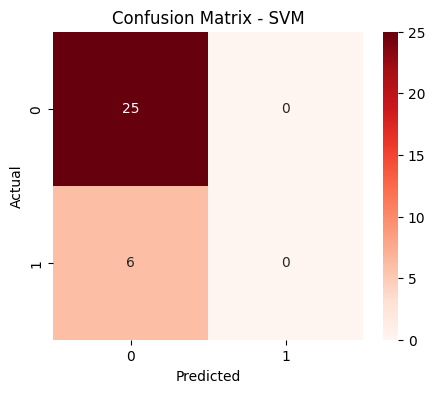

In [169]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Analisis
Model SVM sepenuhnya gagal mengklasifikasikan kelas 1, karena semua sampel diklasifikasikan sebagai kelas 0. Hal ini menyebabkan recall kelas 1 bernilai 0.

### Cek imbalance dataset

C:\Users\MSI 14\AppData\Local\Temp\ipykernel_12092\843032854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=hepadf['Class'], palette="pastel")


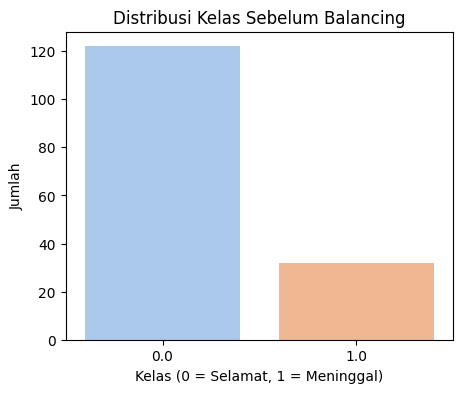

In [171]:
plt.figure(figsize=(5,4))
sns.countplot(x=hepadf['Class'], palette="pastel")
plt.title("Distribusi Kelas Sebelum Balancing")
plt.xlabel("Kelas (0 = Selamat, 1 = Meninggal)")
plt.ylabel("Jumlah")
plt.show()

### Analisis
Berdasarkan cek imbalance, terlihat timpang antara kelas minoritas dan mayoritas

In [177]:
from imblearn.over_sampling import SMOTE

sme = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = sme.fit_resample(X_train, y_train)
print("Resampled dataset:")
print(X_train_resampled)
print(y_train_resampled)

Resampled dataset:
           AGE  SEX   STEROID  ANTIVIRALS   FATIGUE   MALAISE  ANOREXIA  \
0    30.000000    0  2.000000    2.000000  1.000000  2.000000  2.000000   
1    31.000000    0  1.000000    2.000000  1.000000  2.000000  2.000000   
2    51.000000    0  2.000000    2.000000  1.000000  1.000000  1.000000   
3    34.000000    1  1.000000    1.000000  2.000000  2.000000  2.000000   
4    22.000000    1  2.000000    1.000000  1.000000  2.000000  2.000000   
..         ...  ...       ...         ...       ...       ...       ...   
189  47.000000    0  2.000000    2.000000  1.000000  1.000000  2.000000   
190  46.842265    0  1.296981    2.000000  1.000000  2.000000  1.296981   
191  53.181778    0  1.363630    2.000000  1.000000  1.636370  1.000000   
192  38.971782    0  1.000000    1.028218  1.028218  1.028218  2.000000   
193  40.737131    0  1.962447    2.000000  1.000000  1.962447  2.000000   

     LIVER BIG  LIVER FIRM  SPLEEN PALPABLE   SPIDERS  ASCITES   VARICES  \
0   

### Analisis
Digunakan metode SMOTE (Synthetic Minority Over-sampling Technique) untuk melakukan balancing dataset dengan menambah sampel kelas minoritas. fit_resample() melakukan resampling terhadap data train sehingga kelas minoritas memiliki jumlah sampel yang sama dengan kelas mayoritas. Hasilnya disimpan dalam X_train_resampled dan y_train_resampled, lalu dicetak untuk melihat perubahan dataset setelah oversampling.

In [178]:
train_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1).round(2)
train_resampled

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30.00,0,2.00,2.00,1.00,2.00,2.0,2.00,1.0,2.00,2.00,2.00,2.00,2.20,57.00,144.00,4.90,78.00,1.00,0.0
1,31.00,0,1.00,2.00,1.00,2.00,2.0,2.00,2.0,2.00,2.00,2.00,2.00,1.20,75.00,173.00,4.20,54.00,2.00,0.0
2,51.00,0,2.00,2.00,1.00,1.00,1.0,2.00,2.0,2.00,2.00,2.00,2.00,0.90,76.00,271.00,4.40,61.00,1.00,0.0
3,34.00,1,1.00,1.00,2.00,2.00,2.0,2.00,1.0,2.00,2.00,2.00,2.00,0.60,30.00,24.00,4.00,76.00,1.00,0.0
4,22.00,1,2.00,1.00,1.00,2.00,2.0,2.00,2.0,2.00,2.00,2.00,2.00,0.90,48.00,20.00,4.20,64.00,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,47.00,0,2.00,2.00,1.00,1.00,2.0,2.00,1.0,2.00,1.52,1.00,1.00,1.36,124.50,24.81,2.34,38.78,2.00,1.0
190,46.84,0,1.30,2.00,1.00,2.00,1.3,2.00,2.0,1.30,1.00,2.00,2.00,0.88,79.65,49.09,4.06,61.00,1.00,1.0
191,53.18,0,1.36,2.00,1.00,1.64,1.0,2.00,2.0,1.36,1.00,1.64,2.00,2.13,85.00,54.36,3.49,65.36,1.00,1.0
192,38.97,0,1.00,1.03,1.03,1.03,2.0,2.00,1.0,2.00,2.00,2.00,2.00,2.25,278.96,96.62,3.80,41.41,1.03,1.0


In [179]:
train_resampled['Class'].value_counts()

Class
0.0    97
1.0    97
Name: count, dtype: int64

### Analisis
Hasil dari resampling menggunakan SMOTE adalah persentase data 0 dan 1 pada variabel Class menjadi seimbang

In [181]:
# Pisahkan Fitur dan Target
X = train_resampled.drop(columns=['Class'])
y = train_resampled['Class']

X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Analisis
Melakukan split untuk dataset baru dengan hasil balancing data

In [ ]:
# Logistic Regression
log_newreg = LogisticRegression()
log_newreg.fit(X_newtrain, y_newtrain)
y_newpred_lr = log_newreg.predict(X_newtest)
y_newproba_lr = log_newreg.predict_proba(X_newtest)[:, 1]

# Evaluasi Logistic Regression
acc_newlr = accuracy_score(y_newtest, y_newpred_lr)
auc_newlr = roc_auc_score(y_newtest, y_newproba_lr)
print("\n==== Logistic Regression Performance ====")
print(f"Accuracy: {acc_lr:.4f}")
print(f"AUC-ROC Score: {auc_lr:.4f}")
print("Classification Report:\n", classification_report(y_newtest, y_newpred_lr))


==== Logistic Regression Performance ====
Accuracy: 0.8974
AUC-ROC Score: 0.8895
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        20
         1.0       0.89      0.89      0.89        19

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



c:\Users\MSI 14\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Analisis
Model denagn dataset yang telah dilakukan balancing menunjukkan kinerja yang baik dengan akurasi 89,74% dan AUC-ROC 88,95%, menandakan model mampu membedakan kelas dengan baik. Precision dan recall untuk kedua kelas seimbang, menunjukkan model tidak bias terhadap salah satu kelas

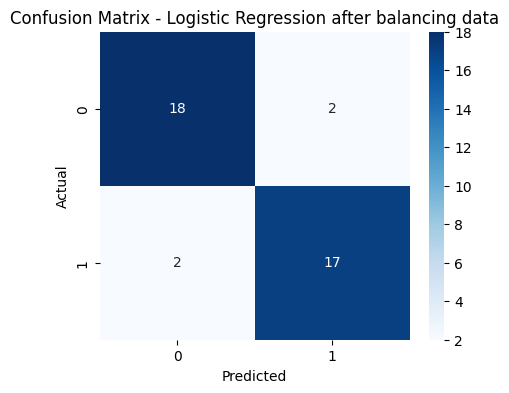

In [184]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_newtest, y_newpred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression after balancing data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Analisis
Setelah balancing data, model Logistic Regression seimbang dalam memprediksi kedua kelas. Dari 39 sampel, 18 kelas 0 dan 17 kelas 1 diprediksi dengan benar, dengan hanya 4 kesalahan klasifikasi (2 false positive dan 2 false negative).

In [185]:
# Random Forest Classifier
rf_newmodel = RandomForestClassifier(n_estimators=100, random_state=42)
rf_newmodel.fit(X_newtrain, y_newtrain)
y_newpred_rf = rf_newmodel.predict(X_newtest)
y_newproba_rf = rf_newmodel.predict_proba(X_newtest)[:, 1]

# Evaluasi Random Forest
acc_newrf = accuracy_score(y_newtest, y_newpred_rf)
auc_newrf = roc_auc_score(y_newtest, y_newproba_rf)
print("\n==== Random Forest Performance ====")
print(f"Accuracy: {acc_rf:.4f}")
print(f"AUC-ROC Score: {auc_rf:.4f}")
print("Classification Report:\n", classification_report(y_newtest, y_newpred_rf))


==== Random Forest Performance ====
Accuracy: 0.9032
AUC-ROC Score: 0.9267
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        20
         1.0       0.95      0.95      0.95        19

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39



### Analisis
Setelah balancing data, model Random Forest menunjukkan akurasi tinggi sebesar 90.32% dengan AUC-ROC 0.9267, menandakan kemampuan prediksi kedua kelas yang baik. 

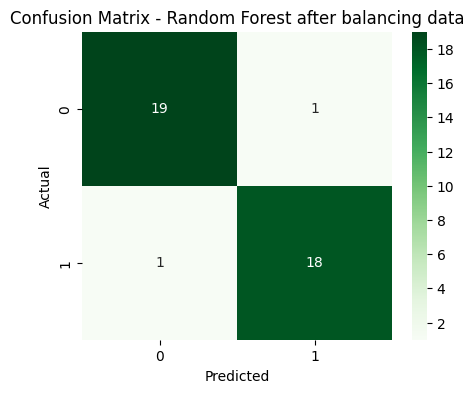

In [186]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_newtest, y_newpred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest after balancing data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Analisis
Setelah balancing data, model Random Forest menunjukkan performa yang sangat baik dengan hanya dua kesalahan prediksi, yaitu satu false positive dan satu false negative. Model mampu mengenali kedua kelas secara seimbang.

In [190]:
## Support Vector Machine (SVM) 
svm_newmodel = SVC(probability=True, random_state=42)
svm_newmodel.fit(X_newtrain, y_newtrain)
y_newpred_svm = svm_newmodel.predict(X_newtest)
y_newproba_svm = svm_newmodel.predict_proba(X_newtest)[:, 1]

# Evaluasi SVM
acc_newsvm = accuracy_score(y_newtest, y_newpred_svm)
auc_newsvm = roc_auc_score(y_newtest, y_newproba_svm)
print("\n==== SVM Performance ====")
print(f"Accuracy: {acc_svm:.4f}")
print(f"AUC-ROC Score: {auc_svm:.4f}")
print("Classification Report:\n", classification_report(y_newtest, y_newpred_svm))


==== SVM Performance ====
Accuracy: 0.8065
AUC-ROC Score: 0.2667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.30      0.44        20
         1.0       0.56      0.95      0.71        19

    accuracy                           0.62        39
   macro avg       0.71      0.62      0.58        39
weighted avg       0.71      0.62      0.57        39



### Analisis
Setelah balancing data, performa SVM malah mengalami penurunan akurasi dan AUC-ROC, menunjukkan bahwa model kesulitan dalam memisahkan kelas dengan baik. Recall untuk kelas minoritas meningkat secara signifikan, tetapi precision untuk kelas mayoritas menurun drastis.

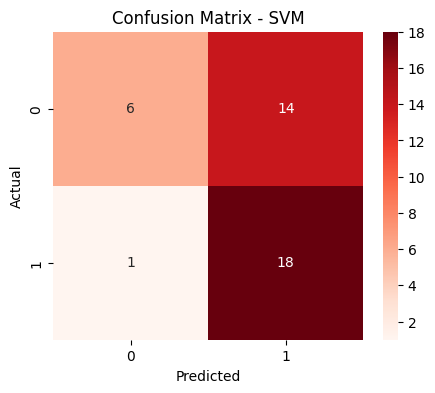

In [188]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_newtest, y_newpred_svm), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Analisis
Setelah balancing data, SVM mengalami kesulitan dalam mengenali kelas mayoritas, terlihat dari banyaknya false positive (14 kasus). Meskipun recall untuk kelas minoritas meningkat menjadi 0.95, model memiliki precision yang lebih rendah, yang mengindikasikan bahwa banyak prediksi kelas 1 yang sebenarnya adalah kelas 0.

C:\Users\MSI 14\AppData\Local\Temp\ipykernel_12092\433145834.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="coolwarm")


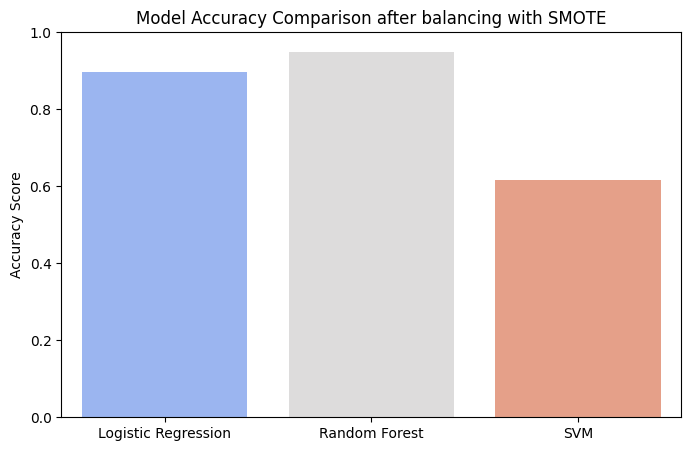

C:\Users\MSI 14\AppData\Local\Temp\ipykernel_12092\433145834.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=auc_scores, palette="coolwarm")


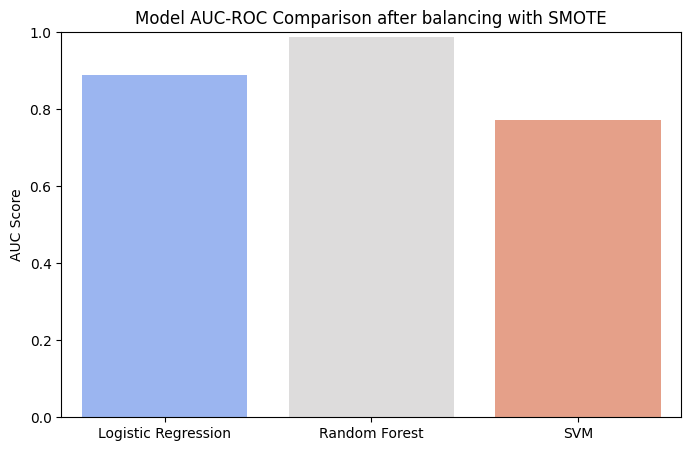

In [189]:
# Perbandingan Akurasi Model
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [acc_newlr, acc_newrf, acc_newsvm]
auc_scores = [auc_newlr, auc_newrf, auc_newsvm]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.title("Model Accuracy Comparison after balancing with SMOTE")
plt.ylabel("Accuracy Score")
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=auc_scores, palette="coolwarm")
plt.title("Model AUC-ROC Comparison after balancing with SMOTE")
plt.ylabel("AUC Score")
plt.ylim(0,1)
plt.show()

### Analisis
Setelah balancing dengan SMOTE, Random Forest memiliki akurasi tertinggi, diikuti oleh Logistic Regression, sedangkan SVM memiliki akurasi yang jauh lebih rendah. Hal ini menunjukkan bahwa SVM kurang mampu memanfaatkan data yang sudah di-balancing dengan baik dibandingkan dengan model lainnya.

### MOdel yang paling bagus
Model yang paling bagus adalah Random Forest, karena memiliki akurasi tertinggi setelah balancing dengan SMOTE serta performa yang lebih stabil dalam mendeteksi kedua kelas.
### Dataset yang baik
Dataset yang lebih baik adalah yang sudah di-balance, karena model dapat belajar dengan lebih baik dari kedua kelas tanpa bias terhadap mayoritas. Jika dataset tetap imbalance, model cenderung mengabaikan kelas minoritas, menyebabkan rendahnya recall dan f1-score pada kelas tersebut.